## Import libraries that needed to reconstruct and visualize data

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from src.compress_sensing_library import *
from src.utility_library import *
from PIL import Image, ImageOps


## Preparing parameters needed for the examples

In [2]:
#Hyperparameter Values
small_img = "tree_part1.jpg"
big_img="peppers.png"
method = 'dct'
observation="pixel"
mode = '-c'
alpha=0.1
num_cell_100 = 100
num_cell_300 = 300
cell_size = 7
sparse_freq = 2

## For wavelet variable
lv= 2
dwt_type= 'db2'


## Load Images

(30, 30, 3)
(30, 30)


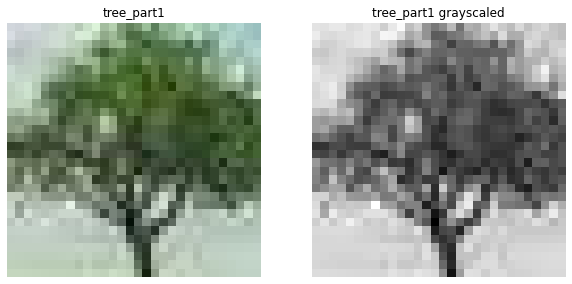

(512, 512, 3)
(512, 512)


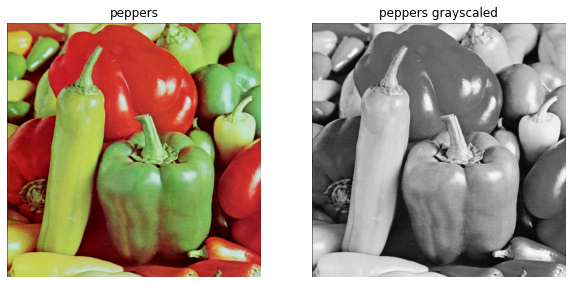

In [3]:
# Represent image as numpy array to make it easier to process
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))

small_img_arr = process_image(small_img, mode)
ax1.imshow(small_img_arr)
ax1.set_title("{img}".format(img = small_img.split('.')[0]))
ax1.axis('off')
print(small_img_arr.shape)
small_img_arr_gray = process_image(small_img, 'gray')
ax2.imshow(small_img_arr_gray, 'gray')
print(small_img_arr_gray.shape)
ax2.set_title("{img} grayscaled".format(img = small_img.split('.')[0]))
ax2.axis('off')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
big_img_arr = process_image(big_img, mode)
ax1.imshow(big_img_arr)
ax1.set_title("{img}".format(img = big_img.split('.')[0]))
ax1.axis('off')
print(big_img_arr.shape)
big_img_arr_gray = process_image(big_img, 'gray')
ax2.imshow(big_img_arr_gray, 'gray')
ax2.set_title("{img} grayscaled".format(img = big_img.split('.')[0]))
ax2.axis('off')
print(big_img_arr_gray.shape)
plt.show()


## Reconstruct Images using Compress_Sensing_Library

### * Reconstruction Using Pixel Observation with grayscaled reconstruction Vs Color Reconstruction

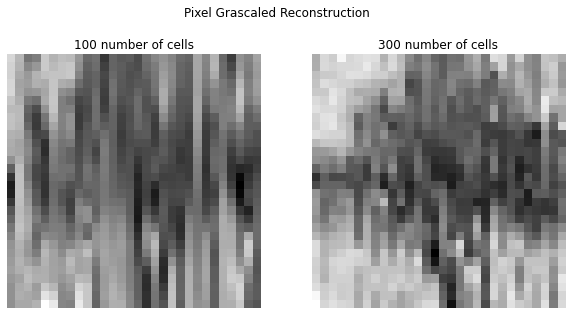

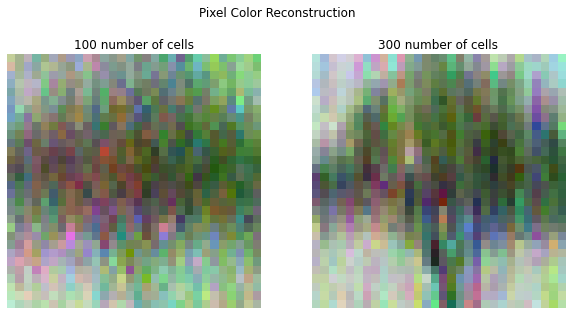

In [4]:
# Pixel
pixel_W_100, pixel_y_100 = generate_pixel_variables(small_img_arr_gray, num_cell_100)
pixel_W_300, pixel_y_300 = generate_pixel_variables(small_img_arr_gray, num_cell_300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))

fig.suptitle("Pixel Grascaled Reconstruction")
## Reconstruction with 100 number of cells grayscaled
theta_gray_100, reconst_gray_100, s_gray_100 = reconstruct(pixel_W_100, pixel_y_100, alpha)
ax1.imshow(reconst_gray_100, 'gray')
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")

## Reconstruction with 300 number of cells grayscaled
theta_gray_300, reconst_gray_300, s_gray_300 = reconstruct(pixel_W_300, pixel_y_300, alpha)
ax2.imshow(reconst_gray_300, 'gray')
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
fig.suptitle("Pixel Color Reconstruction")
## Reconstruction with 100 number of cells
reconst_color_100 = color_reconstruct(small_img_arr, num_cell_100, alpha, observation = 'pixel')
ax1.imshow(reconst_color_100)
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")


## Reconstruction with 300 number of cells
reconst_color_300 = color_reconstruct(small_img_arr, num_cell_300, alpha, observation = 'pixel')
ax2.imshow(reconst_color_300)
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()


Process Reconstruction on (540, 540) image
Process Reconstruction on (540, 540) image


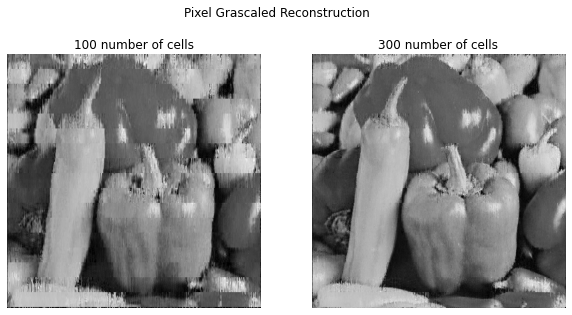

Process Reconstruction on (540, 540, 3) image
Process Reconstruction on (540, 540, 3) image


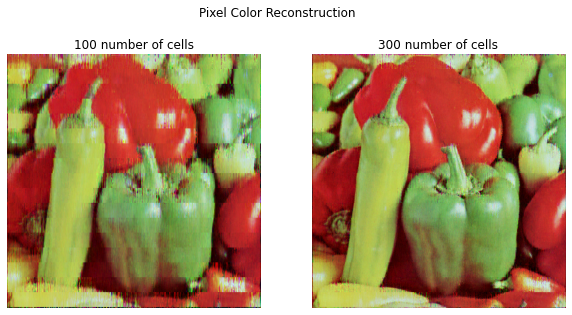

In [6]:
# Pixel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))

fig.suptitle("Pixel Grascaled Reconstruction")
## Reconstruction with 100 number of cells grayscaled
reconst_gray_100 = filter_reconstruct(big_img_arr_gray, num_cell_100, cell_size, sparse_freq, alpha = alpha, mode = '-b', observation = 'pixel')
ax1.imshow(reconst_gray_100, 'gray')
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")

## Reconstruction with 300 number of cells grayscaled
reconst_gray_300 = filter_reconstruct(big_img_arr_gray, num_cell_300, cell_size, sparse_freq, alpha = alpha, mode = '-b', observation = 'pixel')
ax2.imshow(reconst_gray_300, 'gray')
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
fig.suptitle("Pixel Color Reconstruction")
## Reconstruction with 100 number of cells
reconst_color_100 = filter_reconstruct(big_img_arr, num_cell_100, cell_size, sparse_freq, alpha = alpha, mode = 'color', observation = 'pixel')
ax1.imshow(reconst_color_100)
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")


## Reconstruction with 300 number of cells
reconst_color_300 = filter_reconstruct(big_img_arr, num_cell_300, cell_size, sparse_freq, alpha = alpha, mode = 'color', observation = 'pixel')
ax2.imshow(reconst_color_300)
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()

### * Reconstruction Using Gaussian Observation with grayscaled reconstruction Vs Color Reconstruction

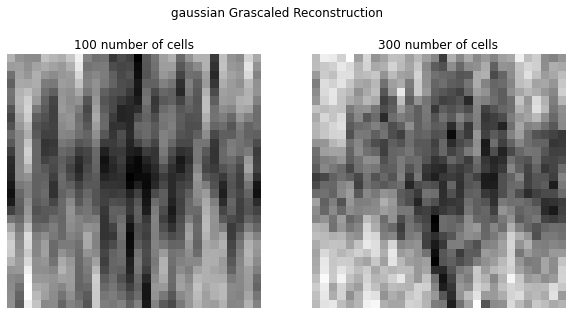

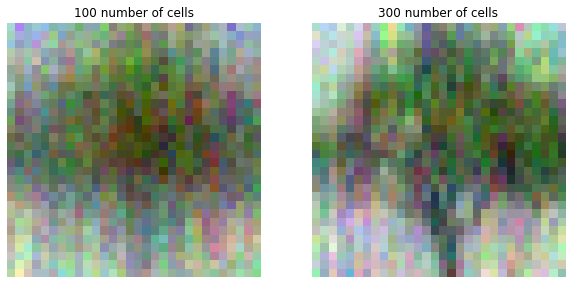

In [7]:
# Gaussian observation on small image
gaussian_W_100, gaussian_y_100 = generate_gaussian_variables(small_img_arr_gray, num_cell_100)
gaussian_W_300, gaussian_y_300 = generate_gaussian_variables(small_img_arr_gray, num_cell_300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))

fig.suptitle("gaussian Grascaled Reconstruction")
## Reconstruction with 100 number of cells grayscaled
theta_gray_100, reconst_gray_100, s_gray_100 = reconstruct(gaussian_W_100, gaussian_y_100, alpha)
ax1.imshow(reconst_gray_100, 'gray')
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")

# ## Reconstruction with 300 number of cells grayscaled
theta_gray_300, reconst_gray_300, s_gray_300 = reconstruct(gaussian_W_300, gaussian_y_300, alpha)
ax2.imshow(reconst_gray_300, 'gray')
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
## Reconstruction with 100 number of cells
reconst_color_100 = color_reconstruct(small_img_arr, num_cell_100, alpha, observation = 'gaussian')
ax1.imshow(reconst_color_100)
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")


## Reconstruction with 300 number of cells
reconst_color_300 = color_reconstruct(small_img_arr, num_cell_300, alpha, observation = 'gaussian')
ax2.imshow(reconst_color_300)
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.show()

Process Reconstruction on (540, 540) image
Process Reconstruction on (540, 540) image


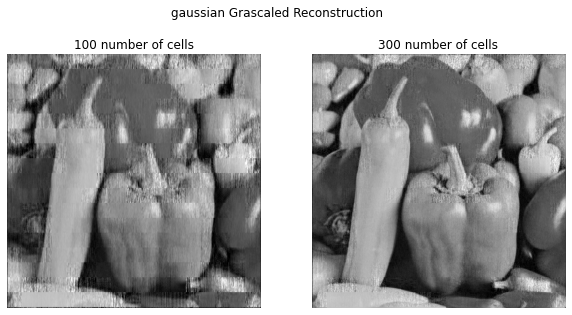

Process Reconstruction on (540, 540, 3) image
Process Reconstruction on (540, 540, 3) image


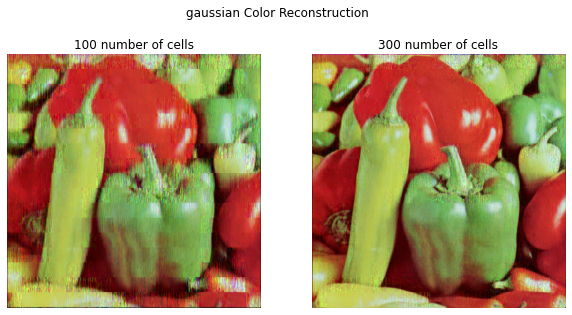

In [8]:
# Gaussian observation on big image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))

fig.suptitle("gaussian Grascaled Reconstruction")
## Reconstruction with 100 number of cells grayscaled
reconst_gray_100 = filter_reconstruct(big_img_arr_gray, num_cell_100, cell_size, sparse_freq, alpha = alpha, mode = '-b', observation = 'gaussian')
ax1.imshow(reconst_gray_100, 'gray')
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")

## Reconstruction with 300 number of cells grayscaled
reconst_gray_300 = filter_reconstruct(big_img_arr_gray, num_cell_300, cell_size, sparse_freq, alpha = alpha, mode = '-b', observation = 'gaussian')
ax2.imshow(reconst_gray_300, 'gray')
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
fig.suptitle("gaussian Color Reconstruction")
## Reconstruction with 100 number of cells
reconst_color_100 = filter_reconstruct(big_img_arr, num_cell_100, cell_size, sparse_freq, alpha = alpha, mode = 'color', observation = 'gaussian')
ax1.imshow(reconst_color_100)
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")


## Reconstruction with 300 number of cells
reconst_color_300 = filter_reconstruct(big_img_arr, num_cell_300, cell_size, sparse_freq, alpha = alpha, mode = 'color', observation = 'gaussian')
ax2.imshow(reconst_color_300)
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()

### * Reconstruction Using V1 Observation with grayscaled reconstruction Vs Color Reconstruction

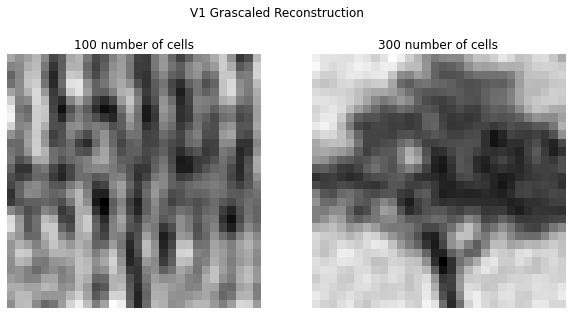

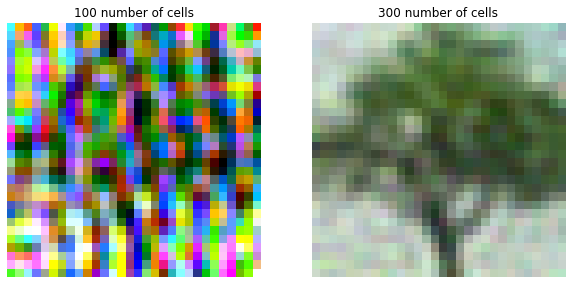

In [9]:
# V1 observation on small image
V1_W_100, V1_y_100 = generate_V1_variables(small_img_arr_gray, num_cell_100, cell_size, sparse_freq)
V1_W_300, V1_y_300 = generate_V1_variables(small_img_arr_gray, num_cell_300, cell_size, sparse_freq)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))

fig.suptitle("V1 Grascaled Reconstruction")
## Reconstruction with 100 number of cells grayscaled
theta_gray_100, reconst_gray_100, s_gray_100 = reconstruct(V1_W_100, V1_y_100, alpha)
ax1.imshow(reconst_gray_100, 'gray')
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")

# ## Reconstruction with 300 number of cells grayscaled
theta_gray_300, reconst_gray_300, s_gray_300 = reconstruct(V1_W_300, V1_y_300, alpha)
ax2.imshow(reconst_gray_300, 'gray')
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
## Reconstruction with 100 number of cells
reconst_color_100 = color_reconstruct(small_img_arr, num_cell_100, cell_size = cell_size, sparse_freq = sparse_freq, alpha = alpha, observation = 'V1')
ax1.imshow(reconst_color_100)
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")


## Reconstruction with 300 number of cells
reconst_color_300 = color_reconstruct(small_img_arr, num_cell_300, cell_size = cell_size, sparse_freq = sparse_freq, alpha = alpha, observation = 'V1')
ax2.imshow(reconst_color_300)
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.show()

Process Reconstruction on (540, 540) image
Process Reconstruction on (540, 540) image


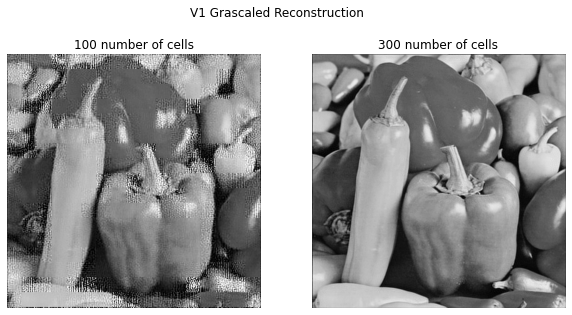

Process Reconstruction on (540, 540, 3) image
Process Reconstruction on (540, 540, 3) image


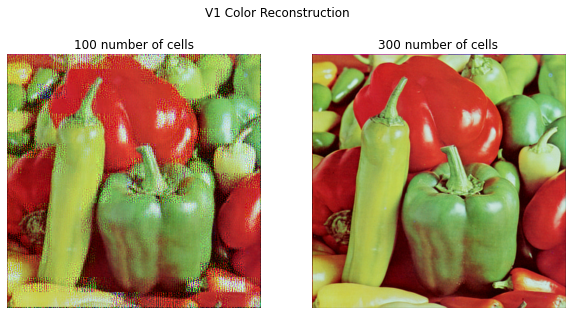

In [10]:
# V1 observation on big image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))

fig.suptitle("V1 Grascaled Reconstruction")
## Reconstruction with 100 number of cells grayscaled
reconst_gray_100 = filter_reconstruct(big_img_arr_gray, num_cell_100, cell_size, sparse_freq, alpha = alpha, mode = '-b', observation = 'V1')
ax1.imshow(reconst_gray_100, 'gray')
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")

## Reconstruction with 300 number of cells grayscaled
reconst_gray_300 = filter_reconstruct(big_img_arr_gray, num_cell_300, cell_size, sparse_freq, alpha = alpha, mode = '-b', observation = 'V1')
ax2.imshow(reconst_gray_300, 'gray')
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
fig.suptitle("V1 Color Reconstruction")
## Reconstruction with 100 number of cells
reconst_color_100 = filter_reconstruct(big_img_arr, num_cell_100, cell_size, sparse_freq, alpha = alpha, mode = 'color', observation = 'V1')
ax1.imshow(reconst_color_100)
ax1.set_title("{num_cell} number of cells".format(num_cell = num_cell_100))
ax1.axis("off")


## Reconstruction with 300 number of cells
reconst_color_300 = filter_reconstruct(big_img_arr, num_cell_300, cell_size, sparse_freq, alpha = alpha, mode = 'color', observation = 'V1')
ax2.imshow(reconst_color_300)
ax2.set_title("{num_cell} number of cells".format(num_cell = num_cell_300))
ax2.axis("off")
plt.subplots_adjust(top=1.35)
plt.show()